In [1]:
#import libraries
import seaborn as sns
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#generate sample data
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=0)
y=y.reshape(-1,1)
data = np.concatenate((X,y), axis=1)
clust_dat = pd.DataFrame(data, columns=['x1', 'x2', 'clusters'])

In [3]:
clust_dat.describe()

,x1,x2,clusters
count,1000.000000,1000.000000,1000.000000
mean,0.474105,2.693101,0.999000
std,1.812607,1.706040,0.817109
min,-4.521517,-1.936891,0.000000
25%,-1.041722,1.302741,0.000000
50%,0.675845,2.801684,1.000000
75%,1.885744,4.047832,2.000000
max,5.226242,6.716241,2.000000


Data exploration

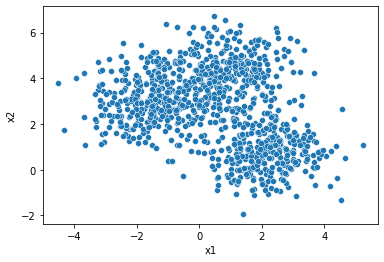

In [ ]:
#plot unlabeled data
sns.scatterplot(x='x1', y='x2', data=clust_dat)

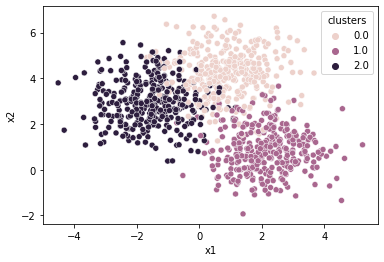

In [ ]:
#plot labeled data
sns.scatterplot(x='x1', y='x2', hue='clusters', data=clust_dat)

Inititiate the evaluation metric

In [ ]:
from sklearn.metrics import silhouette_score

Baseline label

In [ ]:
#baseline label
base_score = silhouette_score(X, y.ravel())
base_score

0.42914484799066793

Preprocess data

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaling data before buidling a model
sc = StandardScaler()
sc_fit = sc.fit(X)
X_SC = sc.transform(X) 

Apply k-means clustering

In [ ]:
#call k-means method
from sklearn.cluster import KMeans

#set number of clusters for experiment and scores storage
n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_kmeans = []

#scaling data before buidling a model
sc = StandardScaler()
sc_fit = sc.fit(X)
X_SC = sc.transform(X) 

#find the optimum number of clusters 
for cluster in n_clusters:
  y_kmeans = KMeans(init="k-means++", n_clusters=cluster, random_state=0).fit_predict(X_SC)
  scores_kmeans.append(silhouette_score(X, y_kmeans))

scores_kmeans = np.array(scores_kmeans)
clusters = np.array(n_clusters)

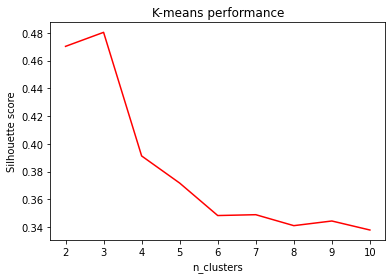

In [ ]:
#visualizing results - score
plt.title("K-means performance") 
plt.xlabel("n_clusters") 
plt.ylabel("Silhouette score") 
plt.plot(clusters, scores_kmeans, color ="red") 
plt.show()

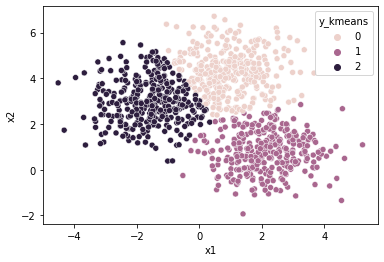

In [ ]:
#add the best k-means (k=3) labels to dataset
clust_dat['y_kmeans'] = KMeans(init="k-means++", n_clusters=3, random_state=0).fit_predict(X_SC)

#plot the results
sns.scatterplot(x='x1', y='x2', hue='y_kmeans', data=clust_dat)

Apply DBSCAN

In [ ]:
#load DBSCAN
from sklearn.cluster import DBSCAN

In [ ]:
EPS= [0.1, 0.2, 0.3, 0.5, 0.7]
MIN_SAMP = [2, 3, 5, 7]
scores_DBSCAN = []
params = []

for eps in EPS:
  for min in MIN_SAMP:
    y_DBSCAN = DBSCAN(eps=eps, min_samples=min).fit_predict(X_SC)
    scores_DBSCAN.append(silhouette_score(X, y_DBSCAN))
    params.append((eps, min))

In [ ]:
#visualizing results - score
scores_DB = pd.DataFrame({'Parameters': params, 
                          'Scores' :scores_DBSCAN})

scores_DB.sort_values(by='Scores', ascending=False)
#best model: set eps=0.3, min_samples=7

,Parameters,Scores
15,"(0.5, 7)",0.328799
9,"(0.3, 3)",0.326010
10,"(0.3, 5)",0.325578
11,"(0.3, 7)",0.320422
14,"(0.5, 5)",0.288875
13,"(0.5, 3)",0.288875
12,"(0.5, 2)",0.288875
18,"(0.7, 5)",0.241666
17,"(0.7, 3)",0.241666
16,"(0.7, 2)",0.241666


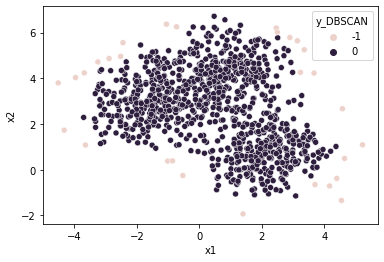

In [ ]:
#best model: set eps=0.3, min_samples=7
clust_dat['y_DBSCAN'] = DBSCAN(eps=0.3, min_samples=7).fit_predict(X_SC)

#plot the results
sns.scatterplot(x='x1', y='x2', hue='y_DBSCAN', data=clust_dat)